In [1]:
from primitives.primitives import *
from cirq import Circuit, LineQid, measure, sample, Simulator
from scipy.linalg import expm
import matplotlib.pyplot as plt
from numpy.linalg import eig
import re
from scipy import sparse
from scipy.constants import hbar

simulator = Simulator()

## t-V model definition

One-dimensional spinless t-V model (range=1):

$H = -t \sum_{i=1}^{L} \left( c_i^\dagger c_{i+1} + h.c.\right) + V \sum_{i=1}^L n_i n_{i+1}$

In the 2D case we have to define horizontal and vertical hopping operators.

### Horizontal hopping operators

$H_x^{hop} (i, i+1) = i \Gamma^1_{i} \Gamma^2_{i+1} \left(\tilde \Gamma_i -\tilde\Gamma_{i+1}\right)$

In [251]:
op = -1j * TensorProduct(sy_gamma_1, sy_gamma_2 * sy_gamma_5)
op2 = 1j * TensorProduct(sy_gamma_2 * sy_gamma_5, sy_gamma_1)
op.adjoint()

Matrix([
[  0,    0,   0,    0,   0,    0,   0,    0,   0,    0, 1.0,    0,   0,    0,   0,    0],
[  0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0, -1.0,   0,    0,   0,    0],
[  0,    0,   0,    0,   0,    0,   0,    0, 1.0,    0,   0,    0,   0,    0,   0,    0],
[  0,    0,   0,    0,   0,    0,   0,    0,   0, -1.0,   0,    0,   0,    0,   0,    0],
[  0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0, 1.0,    0],
[  0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0, -1.0],
[  0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0, 1.0,    0,   0,    0],
[  0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0, -1.0,   0,    0],
[  0,    0, 1.0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0],
[  0,    0,   0, -1.0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0],
[1.0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0],
[

In [255]:
op + op2

Matrix([
[0,    0, 0,    0,   0, 0,   0, 0, 0,    0, 0,    0,   0, 0,   0, 0],
[0,    0, 0,    0,   0, 0,   0, 0, 0,    0, 0, -2.0,   0, 0,   0, 0],
[0,    0, 0,    0,   0, 0,   0, 0, 0,    0, 0,    0,   0, 0,   0, 0],
[0,    0, 0,    0,   0, 0,   0, 0, 0, -2.0, 0,    0,   0, 0,   0, 0],
[0,    0, 0,    0,   0, 0,   0, 0, 0,    0, 0,    0,   0, 0, 2.0, 0],
[0,    0, 0,    0,   0, 0,   0, 0, 0,    0, 0,    0,   0, 0,   0, 0],
[0,    0, 0,    0,   0, 0,   0, 0, 0,    0, 0,    0, 2.0, 0,   0, 0],
[0,    0, 0,    0,   0, 0,   0, 0, 0,    0, 0,    0,   0, 0,   0, 0],
[0,    0, 0,    0,   0, 0,   0, 0, 0,    0, 0,    0,   0, 0,   0, 0],
[0,    0, 0, -2.0,   0, 0,   0, 0, 0,    0, 0,    0,   0, 0,   0, 0],
[0,    0, 0,    0,   0, 0,   0, 0, 0,    0, 0,    0,   0, 0,   0, 0],
[0, -2.0, 0,    0,   0, 0,   0, 0, 0,    0, 0,    0,   0, 0,   0, 0],
[0,    0, 0,    0,   0, 0, 2.0, 0, 0,    0, 0,    0,   0, 0,   0, 0],
[0,    0, 0,    0,   0, 0,   0, 0, 0,    0, 0,    0,   0, 0,   0, 0],
[0,    0, 0

In [254]:
op + op.adjoint()

Matrix([
[  0,    0,   0,    0,   0,    0,   0,    0,   0,    0, 2.0,    0,   0,    0,   0,    0],
[  0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0, -2.0,   0,    0,   0,    0],
[  0,    0,   0,    0,   0,    0,   0,    0, 2.0,    0,   0,    0,   0,    0,   0,    0],
[  0,    0,   0,    0,   0,    0,   0,    0,   0, -2.0,   0,    0,   0,    0,   0,    0],
[  0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0, 2.0,    0],
[  0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0, -2.0],
[  0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0, 2.0,    0,   0,    0],
[  0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0, -2.0,   0,    0],
[  0,    0, 2.0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0],
[  0,    0,   0, -2.0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0],
[2.0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0,   0,    0],
[

In [2]:
x_hop_matrix = 1j * TensorProduct(sy_gamma_1 * sy_gamma_5, sy_gamma_2) - 1j * TensorProduct(sy_gamma_1, sy_gamma_2 * sy_gamma_5)
class HopXGate(Gate):
    """Horizontal hopping gate."""
    def _qid_shape_(self):
        return (4, 4)
    def _unitary_(self):
        return np.array(x_hop_matrix)
    def _circuit_diagram_info_(self, args):
        return ["H_x(r)", "H_x(r+1)"]
x_hop_matrix

Matrix([
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0, -2.0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0, 2.0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0, 2.0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0, -2.0,   0, 0],
[0,    0, 2.0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0, -2.0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0, -2.0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,  

### Vertical hopping operators

$H_y^{hop} (i, i+1) = i \Gamma^3_{i} \Gamma^4_{i+1} \left(\tilde \Gamma_i -\tilde\Gamma_{i+1}\right)$

In [3]:
y_hop_matrix = 1j * TensorProduct(sy_gamma_3 * sy_gamma_5, sy_gamma_4) - 1j * TensorProduct(sy_gamma_3, sy_gamma_4 * sy_gamma_5)
class HopYGate(Gate):
    """Vertical hopping gate."""
    def _qid_shape_(self):
        return (4, 4)
    def _unitary_(self):
        return np.array(y_hop_matrix)
    def _circuit_diagram_info_(self, args):
        return ["H_y(r)", "H_y(r+1)"]
y_hop_matrix

Matrix([
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0, 2.0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0,   0, 0, 0, 2.0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0, 2.0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0, 2.0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0, -2.0,    0, 0],
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0, -2.0, 0],
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0,   0, 0, 0,   0, -2.0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   

### Number operator

$n_i = \frac{1}{2} - \frac{1}{2}\tilde \Gamma_i$

In [4]:
number_matrix = 0.5 * (sy_id - sy_gamma_5)
class NumberGate(Gate):
    """Number gate."""
    def _qid_shape_(self):
        return (4,)
    def _unitary_(self):
        return np.array(number_matrix)
    def _circuit_diagram_info_(self, args):
        return ["n(r)"]
number_matrix

Matrix([
[0,   0,   0, 0],
[0, 1.0,   0, 0],
[0,   0, 1.0, 0],
[0,   0,   0, 0]])

In [5]:
double_number_matrix = TensorProduct(number_matrix, number_matrix)
class DoubleNumberGate(Gate):
    """Double number gate."""
    def _qid_shape_(self):
        return (4,4)
    def _unitary_(self):
        return np.array(double_number_matrix)
    def _circuit_diagram_info_(self, args):
        return ["n(r)", "n(r+1)"]
double_number_matrix

Matrix([
[0, 0, 0, 0, 0,   0,   0, 0, 0,   0,   0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0,   0,   0, 0, 0,   0,   0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0,   0,   0, 0, 0,   0,   0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0,   0,   0, 0, 0,   0,   0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0,   0,   0, 0, 0,   0,   0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1.0,   0, 0, 0,   0,   0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0,   0, 1.0, 0, 0,   0,   0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0,   0,   0, 0, 0,   0,   0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0,   0,   0, 0, 0,   0,   0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0,   0,   0, 0, 0, 1.0,   0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0,   0,   0, 0, 0,   0, 1.0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0,   0,   0, 0, 0,   0,   0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0,   0,   0, 0, 0,   0,   0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0,   0,   0, 0, 0,   0,   0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0,   0,   0, 0, 0,   0,   0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0,   0,   0, 0, 0,   0,   0, 0, 0, 0, 0, 0]])

### Evolution gates

In [190]:
def evolve_gate(gate):
    class evolved(Gate):
        def __init__(self, C=1, t=0.1):
            self.C = C  # coefficient
            self.t = t  # evolution time
            self.matrix = expm(np.array((-1j * self.t) * (self.C * gate()._unitary_()), dtype=np.complex128))
            super()
        def _qid_shape_(self):
            return gate()._qid_shape_()
        def _circuit_diagram_info_(self, args):
            return gate()._circuit_diagram_info_(args)
        def _unitary_(self):
            return self.matrix
    return evolved

# example:
evolution_hopping = evolve_gate(HopYGate)(C = 1, t = 1)

In [191]:
Matrix(evolution_hopping._unitary_())

Matrix([
[1.0,                    0,                    0,   0,                    0,   0,   0,                    0,                   0,   0,   0,                   0,   0,                   0,                   0,   0],
[  0,   -0.416146836547142,                    0,   0, -0.909297426825682*I,   0,   0,                    0,                   0,   0,   0,                   0,   0,                   0,                   0,   0],
[  0,                    0,   -0.416146836547142,   0,                    0,   0,   0, -0.909297426825682*I,                   0,   0,   0,                   0,   0,                   0,                   0,   0],
[  0,                    0,                    0, 1.0,                    0,   0,   0,                    0,                   0,   0,   0,                   0,   0,                   0,                   0,   0],
[  0, -0.909297426825682*I,                    0,   0,   -0.416146836547142,   0,   0,                    0,                   0,   0, 

## Evolving a state

In [192]:
def evolve(qudits, temps, initial=None, T=1, V=0, exact=False, shots=10):

    if initial is None:
        initial = []

    if len(temps) > 1:
        evolution_number = evolve_gate(DoubleNumberGate)(C=V, t = temps[1]-temps[0])
        evolution_horizontal_hop = evolve_gate(HopXGate)(C=T, t = temps[1]-temps[0])
        evolution_vertical_hop = evolve_gate(HopYGate)(C=T, t = temps[1]-temps[0])

    results = []
    evolution_circuit = []
    for idx, t in enumerate(temps):

        if t != 0:    
            rows, cols = qudits.shape
            for row in range(rows):
                for col in range(cols):

                    # WITHOUT PERIODIC BOUNDS

                    # vertical interaction
                    if row != rows - 1:
                        a = qudits[row][col]
                        b = qudits[row+1][col]
                        if V != 0:
                            evolution_circuit.append(evolution_number(a, b))
                        evolution_circuit.append(evolution_vertical_hop(a, b))
                    # horizontal interaction
                    if col != cols - 1:
                        a = qudits[row][col]
                        b = qudits[row][col+1]
                        if V != 0:
                            evolution_circuit.append(evolution_number(a, b))
                        evolution_circuit.append(evolution_horizontal_hop(a, b))
                    
        if not exact:
            measures = [measure(qudit, key=f"q{idx}") for idx, qudit in enumerate(qudits.flatten())]
            circuit = Circuit([*initial, *evolution_circuit, *measures])
            results.append((circuit, sample(circuit, repetitions=shots)))
        else:
            circuit = Circuit([*initial, *evolution_circuit])
            results.append((circuit, simulator.simulate(circuit)))
            
    return results

## Constraints

The constraint is (for every plaquette):
$\Gamma^{23}_{r}\Gamma^{23}_{r+x}\Gamma^{23}_{r+x+y}\Gamma^{23}_{r+y} \tilde\Gamma_r \tilde\Gamma_{r+x+y}= I$

We call the first operator G

In [193]:
G = np.array(TensorProduct(sy_gamma_1*sy_gamma_3, sy_gamma_2*sy_gamma_3, sy_gamma_4*sy_gamma_2, sy_gamma_1*sy_gamma_4))

class Project_Constraint_minus(Gate):
    """Gate that prepare an initial state, from the coefficients."""

    def _qid_shape_(self):
        return (4, 4, 4, 4)

    def _unitary_(self):
        return (np.eye(4**4) - G)/2

    def _circuit_diagram_info_(self, args):
        return ["P-", "P-", "P-", "P-"]

class Project_Constraint(Gate):
    """Gate that prepare an initial state, from the coefficients."""

    def _qid_shape_(self):
        return (4, 4, 4, 4)

    def _unitary_(self):
        return (np.eye(4**4) + G)/2

    def _circuit_diagram_info_(self, args):
        return ["P+", "P+", "P+", "P+"]
Project_Constraint()._unitary_()

array([[0.500000000000000, 0, 0, ..., 0, 0, -0.500000000000000],
       [0, 0.500000000000000, 0, ..., 0, 0.500000000000000, 0],
       [0, 0, 0.500000000000000, ..., 0.500000000000000, 0, 0],
       ...,
       [0, 0, 0.500000000000000, ..., 0.500000000000000, 0, 0],
       [0, 0.500000000000000, 0, ..., 0, 0.500000000000000, 0],
       [-0.500000000000000, 0, 0, ..., 0, 0, 0.500000000000000]],
      dtype=object)

### Add fermions

The creation operator for pairs of fermions is:

$f^\dagger_r f^\dagger_{r+x}=i \Gamma^1_r \Gamma^2_{r+x} \frac{(I + \tilde\Gamma_r)(I + \tilde \Gamma_{r+x})}{4}$

In [194]:
class AddPair(Gate):
    """Add pair of fermions (r)+(r+x)."""
    
    def _qid_shape_(self):
        return (4, 4)

    def _unitary_(self):
        return np.array(1j * (1/4) * TensorProduct(sy_gamma_1, sy_gamma_2) * TensorProduct(sy_id + sy_gamma_5, sy_id + sy_gamma_5))

    def _circuit_diagram_info_(self, args):
        return ["f+", "f+"]

AddPair()._unitary_()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.00000000000000],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.00000000000000, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [-1.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

In [195]:
class Hopx(Gate):
    """Hop x fermion (r)+(r+x)."""
    
    def _qid_shape_(self):
        return (4, 4)

    def _unitary_(self):
        hop = TensorProduct(-1j * sy_gamma_1, -1j * sy_gamma_2 * sy_gamma_5)
        return np.array(hop)
        
    def _circuit_diagram_info_(self, args):
        return ["S(r)", "S(r+x)"]

Hopx()._unitary_()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.0*I, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0*I, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, -1.0*I, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0*I, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.0*I, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0*I],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.0*I, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0*I, 0, 0],
       [0, 0, -1.0*I, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1.0*I, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [-1.0*I, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1.0*I, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, -1.0*I, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1.0*I, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, -1.0*I, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1.0*I, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

In [196]:
class AddCoupledPair(Gate):
    """Add two couple of fermions (r)+(r+x) - (r)+(r+x+1) in superposition."""
    
    def _qid_shape_(self):
        return (4, 4, 4)

    def _unitary_(self):
        numb = 1j * (1/4) * TensorProduct(sy_gamma_1, sy_gamma_2) * TensorProduct(sy_id + sy_gamma_5, sy_id + sy_gamma_5)
        numb_hop = TensorProduct(sy_id, Matrix(Hopx()._unitary_()))
        return np.array((1 / np.sqrt(2)) * (TensorProduct(numb, sy_id) + numb_hop))
        
    def _circuit_diagram_info_(self, args):
        return ["f+", "f+/2", "f+/2"]

AddCoupledPair()._unitary_()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

## Evolving a 4x2 lattice

In [220]:
rows = 2
columns = 4

T = -1
V = 0.01

qudits = np.array(LineQid.range(rows * columns, dimension=4)).reshape(rows, columns)
temps = np.arange(0, 11, 5)

# initial circuit that ensures that the correct subspace is used (really?)
initial_circuit = [
    #GateId()(qudits[0][0], qudits[0][1], qudits[1][1], qudits[1][0]),
    Project_Constraint()(qudits[0][0], qudits[0][1], qudits[1][1], qudits[1][0]),
    Project_Constraint()(qudits[0][1], qudits[0][2], qudits[1][2], qudits[1][1]),
    Project_Constraint()(qudits[0][2], qudits[0][3], qudits[1][3], qudits[1][2]),
    
    #Project_Constraint()(qudits[1][0], qudits[1][1], qudits[0][1], qudits[0][0]),
    #Project_Constraint()(qudits[1][1], qudits[1][2], qudits[0][2], qudits[0][1]),
    #Project_Constraint()(qudits[1][2], qudits[1][3], qudits[0][3], qudits[0][2]),
    #Project_Constraint()(qudits[0][3], qudits[0][0], qudits[0][1], qudits[1][3]),

    AddPair()(qudits[0][0], qudits[0][1]),
    #Hopx()(qudits[0][1], qudits[0][2]),
    #AddCoupledPair()(qudits[0][1], qudits[0][0], qudits[0][2]),

]

# results is a list of tuples, every tuple contains the circuit and the result shots
exact = True
results = evolve(qudits, temps, initial_circuit, T=T, V=V, exact=exact)

In [221]:
results[1][0]

0 (d=4): ───P+────────f+───n(r)─────H_y(r)─────n(r)─────H_x(r)─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
            │         │    │        │          │        │
1 (d=4): ───P+───P+───f+───┼────────┼──────────n(r+1)───H_x(r+1)───n(r)─────H_y(r)─────n(r)─────H_x(r)─────────────────────────────────────────────────────────────────────────────────────
            │    │         │        │                              │        │          │        │
2 (d=4): ───┼────P+───P+───┼────────┼──────────────────────────────┼────────┼──────────n(r+1)───H_x(r+1)───n(r)─────H_y(r)─────n(r)─────H_x(r)─────────────────────────────────────────────
            │    │    │    │        │                              │        │                              │        │          │        │
3 (d=4): ───┼────┼────P+───┼────────┼──────────────────────────────┼────────┼──────────────────────────────┼────────┼──────────n(r+1)───H_x(r+1)───n(r)─────H_y(r)─────────────────────────
            │    │    │    │        │                              │        │                              │        │                              │        │
4 (d=4): ───P+───┼────┼────n(r+1)───H_y(r+1)───────────────────────┼────────┼──────────n(r)─────H_x(r)─────┼────────┼──────────────────────────────┼────────┼──────────────────────────────
            │    │    │                                            │        │          │        │          │        │                              │        │
5 (d=4): ───P+───P+───┼────────────────────────────────────────────n(r+1)───H_y(r+1)───n(r+1)───H_x(r+1)───┼────────┼──────────n(r)─────H_x(r)─────┼────────┼──────────────────────────────
                 │    │                                                                                    │        │          │        │          │        │
6 (d=4): ────────P+───P+───────────────────────────────────────────────────────────────────────────────────n(r+1)───H_y(r+1)───n(r+1)───H_x(r+1)───┼────────┼──────────n(r)─────H_x(r)─────
                      │                                                                                                                            │        │          │        │
7 (d=4): ─────────────P+───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────n(r+1)───H_y(r+1)───n(r+1)───H_x(r+1)───

In [222]:
test = results[0][1]
test

measurements: (no measurements)

qubits: (cirq.LineQid(0, dimension=4), cirq.LineQid(1, dimension=4), cirq.LineQid(5, dimension=4), cirq.LineQid(4, dimension=4), cirq.LineQid(2, dimension=4), cirq.LineQid(6, dimension=4), cirq.LineQid(3, dimension=4), cirq.LineQid(7, dimension=4))
output vector: -0.125|11330000⟩ + 0.125|11333333⟩ + 0.125|12030033⟩ + 0.125|12033300⟩ - 0.125|21300033⟩ - 0.125|21303300⟩ - 0.125|22000000⟩ + 0.125|22003333⟩

phase:
output vector: |⟩

In [200]:
rho = Matrix(test.density_matrix_of([qudits[0][1], qudits[1][1]]))
rho

Matrix([
[0, 0, 0, 0, 0, 0, 0,      0,      0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0,      0,      0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0,      0,      0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0,      0,      0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0,      0,      0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0,      0,      0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0,      0,      0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0.0625,      0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0,      0, 0.0625, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0,      0,      0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0,      0,      0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0,      0,      0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0,      0,      0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0,      0,      0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0,      0,      0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0,      0,      0, 0, 0, 0, 0, 0, 0, 0]])

In [201]:
def expectation_value(result, qudits, operator):
    rho = result.density_matrix_of(qudits)
    
    srho = sparse.csr_matrix(np.array(rho, dtype=np.complex128)) 
    srho /= srho.trace()
    shop = sparse.csr_matrix(np.array(operator, dtype=np.complex128))
    val = srho * shop 

    tr = val.trace()
    if np.imag(tr) != 0:
        print(f"Casting {tr} to real")
    return np.real(tr)

expectation_value(results[0][1], [qudits[0][0]], number_matrix)

1.0

## Operators evolution

In [202]:
line_styles = ['-.', '--', '-.', ':', '-.', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p']

### Constraints

(-1.1, 1.1)

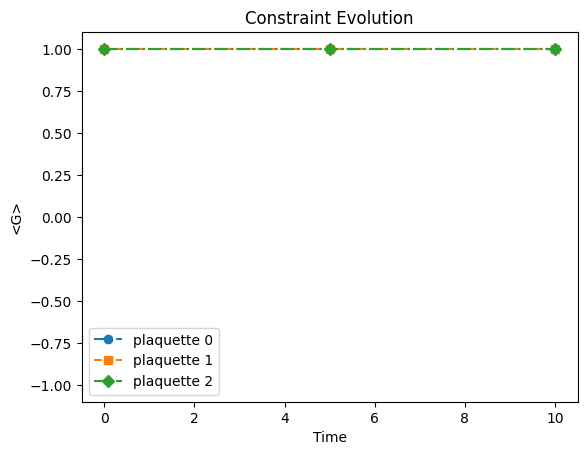

In [223]:
plaqs = [
    [qudits[0][0], qudits[0][1], qudits[1][0], qudits[1][1]],
    [qudits[0][1], qudits[0][2], qudits[1][1], qudits[1][2]],
    [qudits[0][2], qudits[0][3], qudits[1][2], qudits[1][3]]
]
# operator G (order different from before...)
operator = np.array(TensorProduct(sy_gamma_1*sy_gamma_3, sy_gamma_2*sy_gamma_3, sy_gamma_1*sy_gamma_4, sy_gamma_4*sy_gamma_2))

evol_res = {"0": [], "1": [], "2": []}

for idx, plaquette in enumerate(plaqs):
    for state in results:
        #operator = G
        val = expectation_value(state[1], plaquette, operator)
        evol_res[str(idx)].append(np.abs(val))

for i in range(3):
    plt.plot(temps, evol_res[str(i)], label=f"plaquette {i}", linestyle=line_styles[i], marker=markers[i])
    
plt.title("Constraint Evolution")
plt.xlabel("Time")
plt.ylabel("<G>")
plt.legend()
plt.ylim(-1.1, 1.1)

In [224]:
evol_res

{'0': [1.0, 1.0, 1.0],
 '1': [1.0, 1.0, 0.9999999999999999],
 '2': [1.0, 1.0000000000000002, 1.0]}

### Numbers

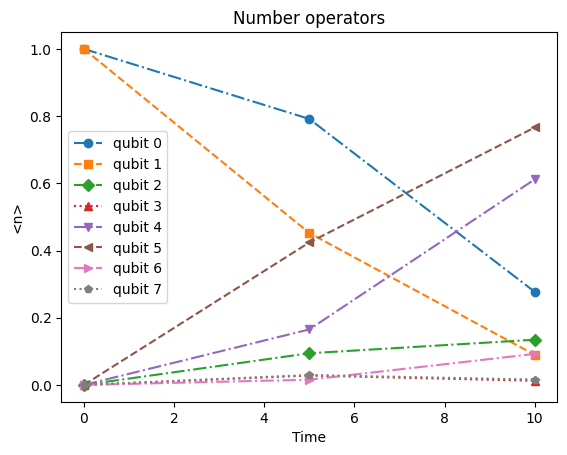

In [225]:
subsystems = [
    [0], [1], [2], [3], [4], [5], [6], [7]
]
num_evol_res = {str(i[0]): [] for i in subsystems}

for idx, sys in enumerate(subsystems):
    for state in results:
        operator = number_matrix
        val = expectation_value(state[1], [qudits.flatten()[idx]], operator)
        num_evol_res[str(idx)].append(np.abs(val))
        
for i, key in enumerate(num_evol_res):
    plt.plot(temps, num_evol_res[key], label=f"qubit {key}", linestyle=line_styles[i], marker=markers[i])
    
plt.title("Number operators")
plt.xlabel("Time")
plt.ylabel("<n>")
plt.legend()

In [226]:
num_evol_res

{'0': [1.0, 0.7916327236836065, 0.2770512757488546],
 '1': [1.0, 0.45225684202482824, 0.08953480800222326],
 '2': [0.0, 0.09423550682558099, 0.13454043865203857],
 '3': [0.0, 0.027889845796403953, 0.01233889254369959],
 '4': [0.0, 0.16510447469776213, 0.6118185671081275],
 '5': [0.0, 0.42388181971094846, 0.7662337536548638],
 '6': [0.0, 0.015531698097179662, 0.09236230895743913],
 '7': [0.0, 0.029467059690560172, 0.016119988605156562]}

In [227]:
x_sum = [sum(values[idx] for values in num_evol_res.values()) for idx in range(len(num_evol_res['0']))]
x_sum

[2.0, 1.9999999705268698, 2.000000033272403]

### Hamiltonian

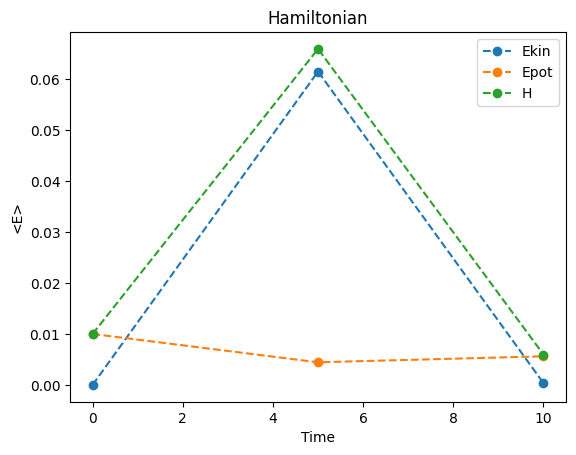

In [228]:
x_hop_couples = []
y_hop_couples = []

rows, cols = qudits.shape
for row in range(rows):
    for col in range(cols):
        if row != rows - 1:
            y_hop_couples.append([qudits[row][col], qudits[row+1][col]])
        if col != cols - 1:
            x_hop_couples.append([qudits[row][col], qudits[row][col+1]])


ekin = []
epot = []

for state in results:
    ham_k = 0
    ham_p = 0
    
    # number term
    couples = x_hop_couples + y_hop_couples
    for couple in couples:
        n = 0.5 * (sy_id - sy_gamma_5)
        operator = V * double_number_matrix
        val = expectation_value(state[1], couple, operator)
        ham_p += val

    # x_hop term
    for couple in x_hop_couples:
        operator = T * x_hop_matrix
        val = expectation_value(state[1], couple, operator)
        ham_k += val    
        
    # y_hop term
    for couple in y_hop_couples:
        operator = T * y_hop_matrix
        val = expectation_value(state[1], couple, operator)
        ham_k += val

    ekin.append(ham_k)
    epot.append(ham_p)

plt.plot(temps, ekin, "o--", label="Ekin")
plt.plot(temps, epot, "o--", label="Epot")

ham = [ekin[i] + ep for i, ep in enumerate(epot)]
plt.plot(temps, ham, "o--", label="H")
    
plt.title("Hamiltonian")
plt.xlabel("Time")
plt.ylabel("<E>")
plt.legend()

In [229]:
lista = [ekin, epot, ham]
listan = ["ekin", "epot", "ham "]
for idx, el in enumerate(lista):
    d = [np.round(i, 4) for i in el]
    print(f"{listan[idx]}: {d}")

ekin: [0.0, 0.0615, 0.0004]
epot: [0.01, 0.0044, 0.0056]
ham : [0.01, 0.0659, 0.006]
